# IMDB Data Analysis

## Get Data, Merge, Clean

### Data Import from CSV

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#import the ratings csv as a dataframe
df_ratings_raw = pd.read_csv("C:\\Users\\Rahul\\OneDrive\\Documents\\Python Scripts\\UCD Project work\\title.ratings.tsv\\data.tsv",
                         sep="\t",low_memory=False, na_values=["\\N","nan"])

#import the titles csv as a dataframe
df_title_basics_raw = pd.read_csv("C:\\Users\\Rahul\\OneDrive\\Documents\\Python Scripts\\UCD Project work\\title.basics.tsv\\data.tsv",
                         sep="\t",low_memory=False, na_values=["\\N","nan"])

#import the principals csv as a dataframe
df_principals_raw = pd.read_csv("C:\\Users\\Rahul\\OneDrive\\Documents\\Python Scripts\\UCD Project work\\title.principals.tsv\\data.tsv",
                         sep="\t",low_memory=True, na_values=["\\N","nan"])

#import the names csv as a dataframe
df_names_raw = pd.read_csv("C:\\Users\\Rahul\\OneDrive\\Documents\\Python Scripts\\UCD Project work\\name.basics.tsv\\data.tsv",
                         sep="\t",low_memory=False, na_values=["\\N","nan"])



### Merge two data sets to get director names

In [3]:
#extract the director names from principals and merge with 
df_principals_raw = df_principals_raw[df_principals_raw["category"] == "director"]
df_directors_names = pd.merge(df_principals_raw, df_names_raw[["nconst","primaryName"]], on = "nconst")
df_directors_names["director-names"] = df_directors_names["category"]+"-"+df_directors_names["primaryName"]
df_directors_names.drop(["ordering","nconst","category","job","characters","primaryName"], axis = 1, inplace = True)

### Exclude unwanted data

In [4]:
df_ratings = df_ratings_raw

#exclude the adult titles
df_title_basics = df_title_basics_raw[df_title_basics_raw.isAdult == 0]

#drop isAdult and endYear columns
df_title_basics.drop(["isAdult","endYear"],axis=1,inplace=True)

#only keep movie and tvmovie type titles.Exclude all other types of videos
df_title_basics = df_title_basics[(df_title_basics.titleType == "movie") | (df_title_basics.titleType == "tvMovie")]



C:\Users\Rahul\AppData\Local\Temp\ipykernel_2456\1384857201.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title_basics.drop(["isAdult","endYear"],axis=1,inplace=True)


### Convert Genre data to dummy columns , Regex usage

In [5]:
#extract Genres into different columns
from sklearn.feature_extraction.text import CountVectorizer

temp = df_title_basics.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names_out()
np.array(unique_genres)
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)

#merge genre back into titles
df_title_basics = pd.merge(df_title_basics,genres, left_index= True, right_index = True)


### Merge dataframes, drop NaN values

In [6]:

#set a common index on both dataframes
df_ratings.set_index('tconst')
df_title_basics.set_index('tconst')

#merge the two datasets
df_merge = pd.merge(df_title_basics,df_ratings,on = ('tconst'))

#remove NA rows
df_merge.dropna(inplace = True)

df_merge.sort_values(['numVotes'], ascending = False)


,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,action,adult,adventure,...,romance,sci-fi,short,sport,talk-show,thriller,war,western,averageRating,numVotes
64259,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,1994.0,142,Drama,0,0,0,...,0,0,0,0,0,0,0,0,9.3,2634619
144256,tt0468569,movie,The Dark Knight,The Dark Knight,2008.0,152,"Action,Crime,Drama",1,0,0,...,0,0,0,0,0,0,0,0,9.0,2605840
190869,tt1375666,movie,Inception,Inception,2010.0,148,"Action,Adventure,Sci-Fi",1,0,1,...,0,1,0,0,0,0,0,0,8.8,2310482
74653,tt0137523,movie,Fight Club,Fight Club,1999.0,139,Drama,0,0,0,...,0,0,0,0,0,0,0,0,8.8,2078402
63366,tt0109830,movie,Forrest Gump,Forrest Gump,1994.0,142,"Drama,Romance",0,0,0,...,1,0,0,0,0,0,0,0,8.8,2039358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284421,tt6054258,movie,Os Dias de Mário Cláudio: Tocata e Fuga,Os Dias de Mário Cláudio: Tocata e Fuga,2016.0,70,Documentary,0,0,0,...,0,0,0,0,0,0,0,0,4.6,5
198214,tt14755950,tvMovie,The Legend of Lu Xiao Feng 5: Jue Zhan Qian Hou,The Legend of Lu Xiao Feng 5: Jue Zhan Qian Hou,2007.0,94,Action,1,0,0,...,0,0,0,0,0,0,0,0,6.0,5
268980,tt4715062,movie,A Global Joy,A Global Joy,2015.0,86,Documentary,0,0,0,...,0,0,0,0,0,0,0,0,8.2,5
198221,tt14758400,tvMovie,Dear Bangladesh,Dear Bangladesh,2018.0,59,Drama,0,0,0,...,0,0,0,0,0,0,0,0,7.4,5


### Select data only for directors who have directed more than 30 movies, remove rows with less count of votes

In [7]:

df_merge = pd.merge(df_merge,df_directors_names,on = ('tconst'))

df_merge['counter'] = 1
df_director_count = pd.DataFrame(df_merge.groupby("director-names")["counter"].sum())

df_director_count = df_director_count[df_director_count['counter']>30]

df_director_count = pd.merge(df_director_count,df_directors_names[["tconst","director-names"]], on = "director-names")

df_director_pivot = df_director_count.pivot_table(values = 'counter', index = 'tconst', columns = 'director-names', fill_value = 0, aggfunc = 'count')

df_merge = pd.merge(df_merge,df_director_pivot,on = ('tconst'))

df_merge = df_merge[df_merge['numVotes']>100]

## Explore Data and Create Charts

### Films Per Year, Voters Per Year

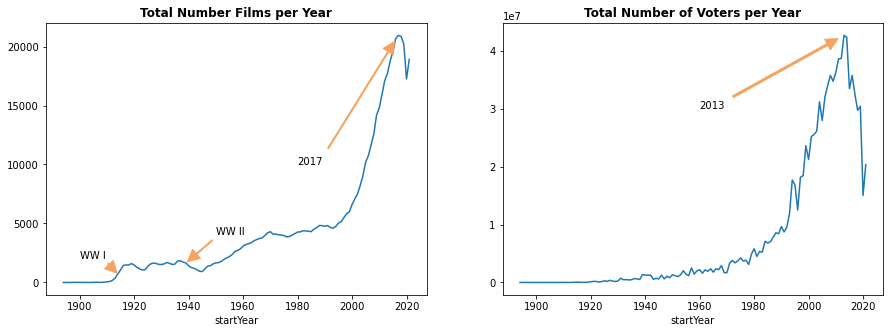

In [103]:
# chart the trend of number of films per year and number of voters per year
merged_temp = pd.merge(df_title_basics, df_ratings_raw, on="tconst",how="left")
merged_temp = merged_temp[(merged_temp.startYear.notnull())&(merged_temp.startYear<2022)]
counts_yearly = merged_temp.groupby("startYear").agg({"averageRating":[np.median],
                                                     "numVotes":[np.sum,np.size,lambda x: np.sum(x)/np.size(x)]})

max_count_year = int(counts_yearly[("numVotes","sum")].idxmax())
max_year = int(counts_yearly[("numVotes","size")].idxmax())

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax =counts_yearly[("numVotes","size")].plot()
ax.annotate(max_year,xy=(max_year,counts_yearly[("numVotes","size")].max()),
            xytext=(1980,10000), arrowprops=dict(color="sandybrown",shrink=0.05,width=1))
ax.annotate("WW I",xy=(1914,counts_yearly[("numVotes","size")].loc[1914]), xytext=(1900,2000), 
            arrowprops=dict(color="sandybrown",shrink=0.05,width=1))
ax.annotate("WW II",xy=(1939,counts_yearly[("numVotes","size")].loc[1939]), xytext=(1950,4000), 
            arrowprops=dict(color="sandybrown",shrink=0.05,width=1))
plt.title("Total Number Films per Year",fontweight="bold")

plt.subplot(1,2,2)
ax =counts_yearly[("numVotes","sum")].plot()
ax.annotate(max_count_year,xy=(max_count_year,counts_yearly[("numVotes","sum")].max()),
            xytext=(1960,3e7),arrowprops=dict(shrink=0.05,color="sandybrown",width=2))
plt.title("Total Number of Voters per Year",fontweight="bold")
plt.show()

Number of movies per year seems to have peaked in 2017 and the number of voters per year seems to have peaked in 2013 and is steadily declining after that. 

### Number of Movies Bucketed by Count of Votes

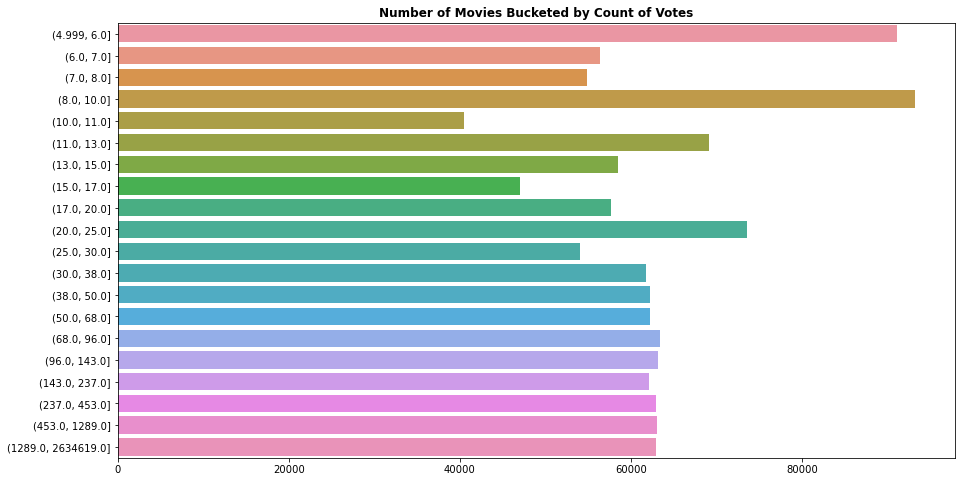

In [38]:
buckets = 20
plt.figure(figsize=(15,8))
bins = pd.qcut(df_ratings.numVotes,buckets,duplicates="drop").value_counts()
sns.barplot(x=bins.values,y=bins.index,orient="h")
plt.title("Number of Movies Bucketed by Count of Votes",fontweight="bold")
plt.show()

Bulk of the movies seem to be in low vote count categories with only a small portion, about ~6% getting more than 1000 votes. Let's plot the same chart with percentage values

### Percentage of Movies Bucketed by Count of Votes

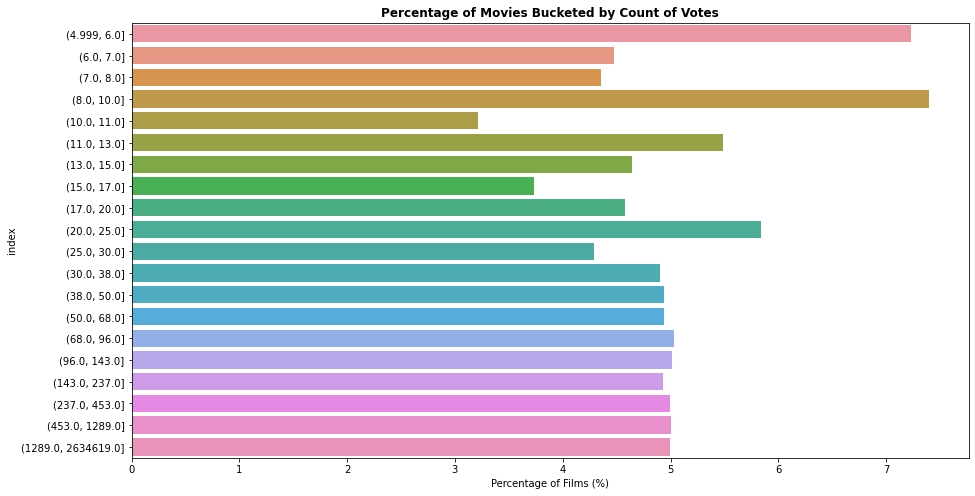

In [37]:
# Percentage of number of movies in each vote count bucket
sorted_genres_perc = 100*pd.Series(pd.DataFrame(bins).reset_index().groupby('index')['numVotes'].sum()).sort_values(ascending=False)/bins.sum()
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
plt.title("Percentage of Movies Bucketed by Count of Votes",fontweight="bold")
plt.show()

Only 5% movies have vote count more than 1200, 95% movies have total vote count less than 1200

### Average Rating and Average Number of Votes Per Year

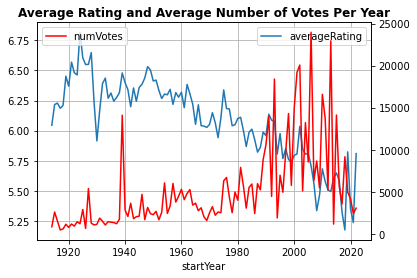

In [35]:
year_rating_votes = pd.pivot_table(data = df_merge, values = ["averageRating","numVotes"], index = "startYear")
ax = year_rating_votes.plot(y = ["averageRating"], kind = 'line', legend = False)
ax2 = ax.twinx()
year_rating_votes.plot(y = ["numVotes"], kind = 'line', ax = ax2, color = 'r', legend = False)
ax.legend()
ax2.legend()
ax.grid(True)
plt.title("Average Rating and Average Number of Votes Per Year",fontweight="bold")
plt.show()

Average Rating per year seems to be steadily declining since 50s. Is it that no longer good movies are being made or the number of poor movies is more in recent times which brings down the per year average. This will be an interesting analysis for a later day

### Genrewise Breakup of Films (%)

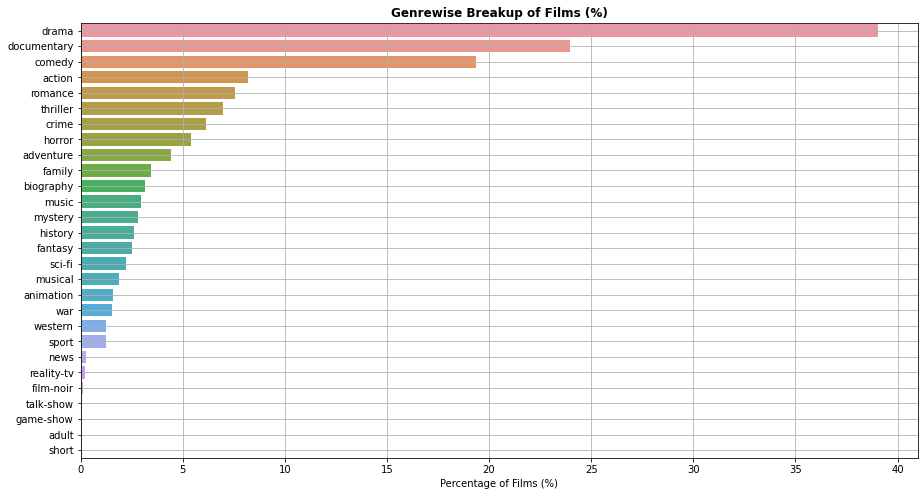

In [104]:
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.grid(True)
plt.xlabel("Percentage of Films (%)")
plt.title("Genrewise Breakup of Films (%)",fontweight="bold")
plt.show()

The most prominent genre is 'Drama' with around 39% movies in this category. This is followed by genre 'Documentary' with about 24% movies. 'Film-noir', 'talk-show', 'game-show', 'adult', 'short' genres are on the fringes with very small percentage numbers. 

### Breakup by Type of Video

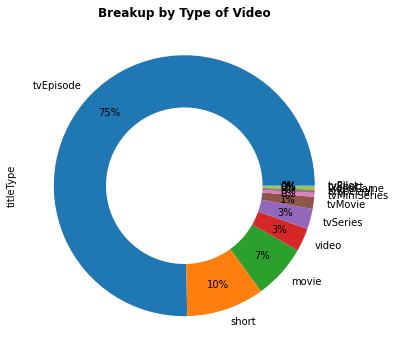

In [40]:
df_title_basics_raw.titleType.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,
                                                 wedgeprops=dict(width=0.4))
plt.title("Breakup by Type of Video",fontweight="bold")
plt.show()

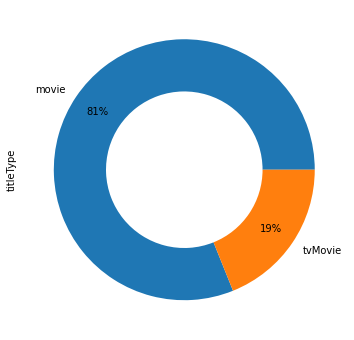

In [73]:

df_title_basics.titleType.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,
                                                 wedgeprops=dict(width=0.4))
plt.show()

## Machine Learning

In [43]:
df_movies = df_merge
#add new column 'isGood' and set it to 1 if averageRating > 6.5, else 0. This is the column that we will predict using ML
df_movies["isGood"] = np.where(df_movies["averageRating"] > 6.5, 1, 0)
#drop averageRating column now
df_movies = df_movies.drop("averageRating", axis = 1)

In [44]:
#set X , y datasets for machine learning
y = df_movies["isGood"]
X = df_movies.drop(["isGood","tconst","titleType", "primaryTitle", "originalTitle","genres", "director-names"], axis = 1)

In [47]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Create a new function to print machine learning stats

In [67]:
def print_stats (xtest, ytest, ypred, model):
    print(color.BOLD+color.BLUE+color.UNDERLINE+ "Score" + color.END, model.score(xtest, ytest))
    print(color.BOLD+color.BLUE+color.UNDERLINE+"Confusion Matrix"+color.END)
    print(confusion_matrix(ytest, ypred))
    print(color.BOLD+color.BLUE+color.UNDERLINE+"Classification Report"+color.END)
    print(classification_report(ytest, ypred))
    return

### Machine Learning - KNN

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                   random_state=21, stratify = y)
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print_stats(X_test, y_test, y_pred, knn)

Score 0.7256795422031473
Confusion Matrix
[[3168  489]
 [1045  890]]
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      3657
           1       0.65      0.46      0.54      1935

    accuracy                           0.73      5592
   macro avg       0.70      0.66      0.67      5592
weighted avg       0.72      0.73      0.71      5592



### Machine Learning - Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print_stats(X_test, y_test, y_pred,logreg)

Score 0.7119098712446352
Confusion Matrix
[[3360  297]
 [1314  621]]
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.92      0.81      3657
           1       0.68      0.32      0.44      1935

    accuracy                           0.71      5592
   macro avg       0.70      0.62      0.62      5592
weighted avg       0.70      0.71      0.68      5592



### ROC CURVE

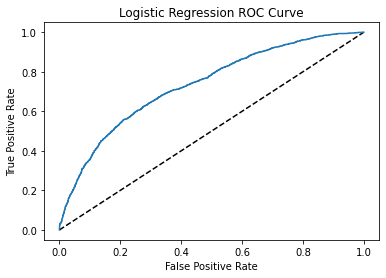

In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1] )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

### Hyper Parameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV, KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
param_grid = {"n_neighbors" : np.arange(1,20,5)}
knn1 = KNeighborsClassifier()
knn_cv = GridSearchCV(knn1, param_grid,cv = kf)
knn_cv.fit(X_train,y_train)
print(knn_cv.best_params_, knn_cv.best_score_)

{'n_neighbors': 16} 0.7281574391033689


### Bagging

In [75]:
#Bagging and Logistic Regression
from sklearn.ensemble import BaggingClassifier
clf_lr = LogisticRegression()
clf_bag = BaggingClassifier(base_estimator = clf_lr)
clf_bag.fit(X_train,y_train)
y_pred = clf_bag.predict(X_test)
print_stats(X_test, y_test, y_pred,clf_bag)

Score 0.7036838340486409
Confusion Matrix
[[3413  244]
 [1413  522]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.93      0.80      3657
           1       0.68      0.27      0.39      1935

    accuracy                           0.70      5592
   macro avg       0.69      0.60      0.60      5592
weighted avg       0.70      0.70      0.66      5592



### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_features = 35, max_depth = 50, bootstrap = True)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
print_stats(X_test, y_test, y_pred,clf_rf)

Score 0.8115164520743919
Confusion Matrix
[[3352  305]
 [ 749 1186]]
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      3657
           1       0.80      0.61      0.69      1935

    accuracy                           0.81      5592
   macro avg       0.81      0.76      0.78      5592
weighted avg       0.81      0.81      0.80      5592



In [98]:
results = pd.DataFrame({("Tuned KNN",knn.score(X_test, y_test)), 
                        ("Logistic Regression",logreg.score(X_test,y_test)),
                       ("Bagging", clf_bag.score(X_test,y_test)),
                       ("Random Forest",clf_rf.score(X_test,y_test))})

In [101]:
results = results.set_index(results[0]).sort_values(1)

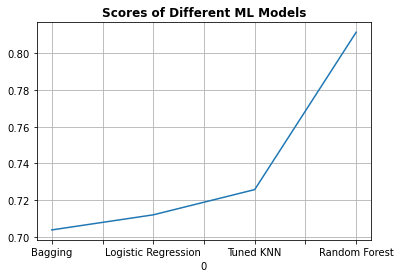

In [102]:
ax = results.plot(y = [1], kind = 'line', legend = False)
ax.grid(True)
plt.title("Scores of Different ML Models",fontweight="bold")
plt.show()